# How does the number of hours spent listening to music per day affect mental health?

- How does the number of hours spent listening to music per day affect mental health?

In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# Read the CSV file
path = '../Data/mxmh_survey_results (1).csv'
survey_df = pd.read_csv(path)
survey_df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [3]:
# Check DataFrame any null value
survey_df.count()

Timestamp                       736
Age                             735
Primary streaming service       735
Hours per day                   736
While working                   733
Instrumentalist                 732
Composer                        735
Fav genre                       736
Exploratory                     736
Foreign languages               732
BPM                             629
Frequency [Classical]           736
Frequency [Country]             736
Frequency [EDM]                 736
Frequency [Folk]                736
Frequency [Gospel]              736
Frequency [Hip hop]             736
Frequency [Jazz]                736
Frequency [K pop]               736
Frequency [Latin]               736
Frequency [Lofi]                736
Frequency [Metal]               736
Frequency [Pop]                 736
Frequency [R&B]                 736
Frequency [Rap]                 736
Frequency [Rock]                736
Frequency [Video game music]    736
Anxiety                     

In [4]:
# Fill the missing values in column 'BPM' and drop any missing values in other columns
survey_df= survey_df.fillna({"BPM": ''})
cleaned_survey_df= survey_df.dropna(how='any')
cleaned_survey_df.count()

Timestamp                       718
Age                             718
Primary streaming service       718
Hours per day                   718
While working                   718
Instrumentalist                 718
Composer                        718
Fav genre                       718
Exploratory                     718
Foreign languages               718
BPM                             718
Frequency [Classical]           718
Frequency [Country]             718
Frequency [EDM]                 718
Frequency [Folk]                718
Frequency [Gospel]              718
Frequency [Hip hop]             718
Frequency [Jazz]                718
Frequency [K pop]               718
Frequency [Latin]               718
Frequency [Lofi]                718
Frequency [Metal]               718
Frequency [Pop]                 718
Frequency [R&B]                 718
Frequency [Rap]                 718
Frequency [Rock]                718
Frequency [Video game music]    718
Anxiety                     

In [5]:
# Narrow down the DataFrame to columns needed for analysis
narrow_cleaned_df = cleaned_survey_df[['Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]
narrow_cleaned_df_copy = narrow_cleaned_df.copy()
narrow_cleaned_df_copy

,Hours per day,Anxiety,Depression,Insomnia,OCD
2,4.0,7.0,7.0,10.0,2.0
3,2.5,9.0,7.0,3.0,3.0
4,4.0,7.0,2.0,5.0,9.0
5,5.0,8.0,8.0,7.0,7.0
6,3.0,4.0,8.0,6.0,0.0
...,...,...,...,...,...
731,2.0,7.0,6.0,0.0,9.0
732,1.0,3.0,2.0,2.0,5.0
733,6.0,2.0,2.0,2.0,2.0
734,5.0,2.0,3.0,2.0,1.0


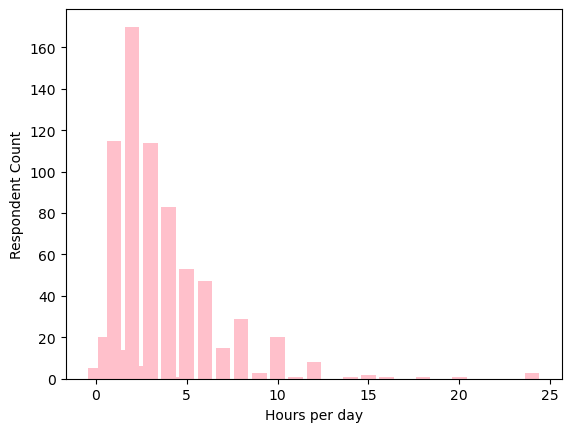

In [6]:
hrs_counts = narrow_cleaned_df_copy['Hours per day'].value_counts()
plt.bar(hrs_counts.index, hrs_counts.values, color= 'pink', align='center')
plt.xlabel('Hours per day')
plt.ylabel('Respondent Count')
plt.show()

In [19]:
# Divide data into 5 groups based on the hours spent listening to music a day
bins = [0, 5, 10, 15, 20, 24]
group_names = ['0 to 5 hrs/day', '6 to 10 hrs/day', '11 to 15 hrs/day', '16 to 20 hrs/day', '21 to 24 hrs/day']
narrow_cleaned_df_copy['hrs/day group'] = pd.cut(narrow_cleaned_df_copy['Hours per day'], bins, labels=group_names, include_lowest=True)
narrow_cleaned_df_copy

,Hours per day,Anxiety,Depression,Insomnia,OCD,hrs/day group
2,4.0,7.0,7.0,10.0,2.0,0 to 5 hrs/day
3,2.5,9.0,7.0,3.0,3.0,0 to 5 hrs/day
4,4.0,7.0,2.0,5.0,9.0,0 to 5 hrs/day
5,5.0,8.0,8.0,7.0,7.0,0 to 5 hrs/day
6,3.0,4.0,8.0,6.0,0.0,0 to 5 hrs/day
...,...,...,...,...,...,...
731,2.0,7.0,6.0,0.0,9.0,0 to 5 hrs/day
732,1.0,3.0,2.0,2.0,5.0,0 to 5 hrs/day
733,6.0,2.0,2.0,2.0,2.0,6 to 10 hrs/day
734,5.0,2.0,3.0,2.0,1.0,0 to 5 hrs/day


In [21]:
# Calculate the average score of the mental health issue for each group and see whether there is any trend
hours_grp = narrow_cleaned_df_copy.groupby("hrs/day group")
round(hours_grp.mean(), 2)

/var/folders/16/qt_t7c5n31q5g2k_npqy3ryw0000gn/T/ipykernel_62239/2009591253.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_grp = narrow_cleaned_df_copy.groupby("hrs/day group")


,Hours per day,Anxiety,Depression,Insomnia,OCD
hrs/day group,,,,,
0 to 5 hrs/day,2.47,5.82,4.74,3.59,2.51
6 to 10 hrs/day,7.42,6.00,4.94,4.11,3.16
11 to 15 hrs/day,12.58,5.50,6.92,5.83,3.00
16 to 20 hrs/day,18.00,6.67,6.67,6.67,8.00
21 to 24 hrs/day,24.00,4.00,2.00,3.00,1.33


## Further analyze the relationship between the hours spent per day listening to music and four types of mental health issues by applying linear regression model

In [22]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_col, y_col):
    x_values = df[x_col]
    y_values = df[y_col]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r value is: {rvalue}")
    print(f"The r^2 value is: {rvalue**2}")
    regress_values = x_values * slope + intercept
    line_equation = "y= " + str(round(slope,2))+ "x+ " +str(round(intercept,2))
    df.plot(kind = 'scatter', x= x_col, y= y_col, xlabel= 'Hours per day', ylabel= y_col, title= f'Hours per day vs {y_col}')
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_equation, (0,32), fontsize=12, color='r')
    plt.show()

### Anxiety vs. Hours per day Linear Regression Plot

The r value is: 0.04547606486214143
The r^2 value is: 0.0020680724753456945


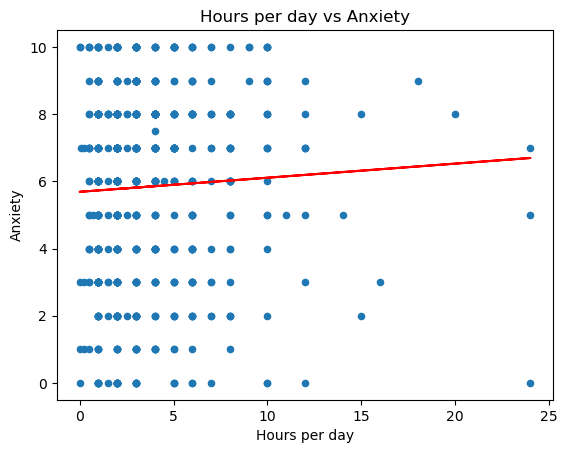

In [23]:
plot_linear_regression(narrow_cleaned_df_copy, 'Hours per day', 'Anxiety')

### Depression vs. Hours per day Linear Regression Plot

The r value is: 0.09725860809806652
The r^2 value is: 0.009459236849173292


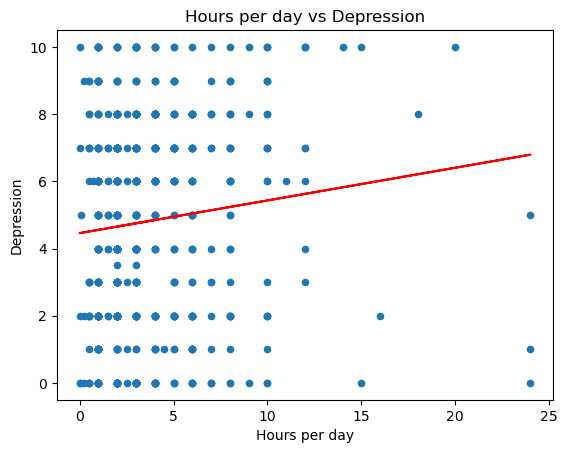

In [24]:
plot_linear_regression(narrow_cleaned_df_copy, 'Hours per day', 'Depression')

### Insomnia vs. Hours per day Linear Regression Plot

The r value is: 0.13549301536320302
The r^2 value is: 0.01835835721221317


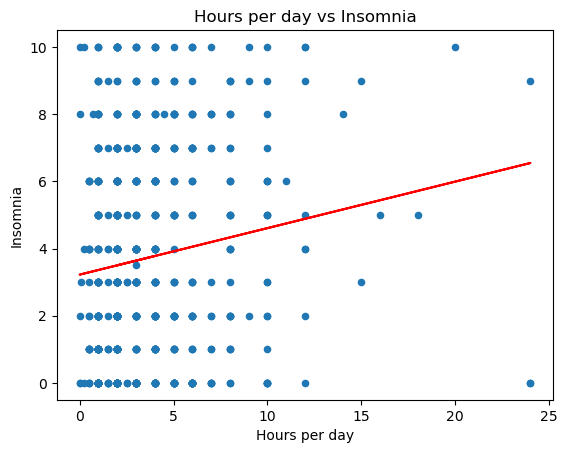

In [25]:
plot_linear_regression(narrow_cleaned_df_copy, 'Hours per day', 'Insomnia')

### OCD vs. Hours per day Linear Regression Plot

The r value is: 0.11358354898678025
The r^2 value is: 0.012901222600432308


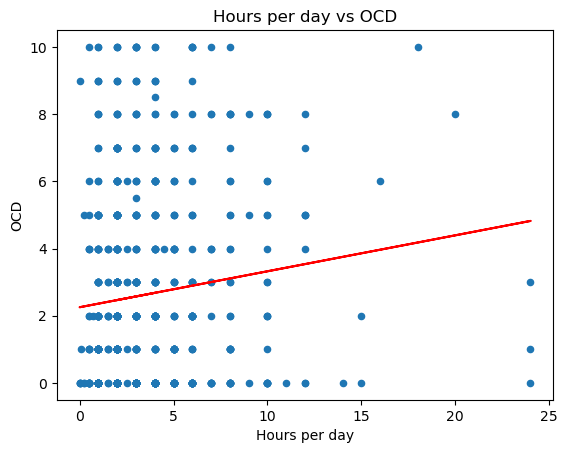

In [26]:
plot_linear_regression(narrow_cleaned_df_copy, 'Hours per day', 'OCD')

We examined the relationship between the hours spent per day listening to music and the levels of various mental health issues reported in the survey, analyzing each relationship individually.

1. Hours per day vs. Anxiety
The r value is: 0.04547606486214143
The r^2 value is: 0.0020680724753456945

2. Hours per day vs. Depression
The r value is: 0.09725860809806652
The r^2 value is: 0.009459236849173292

3. Hours per day vs. Insomnia
The r value is: 0.13549301536320302
The r^2 value is: 0.01835835721221317

4. Hours per day vs. OCD
The r value is: 0.11358354898678025
The r^2 value is: 0.012901222600432308

The absolute values of the correlation coefficients (r) for each relationship are all less than 0.3, indicating either none or very weak correlation between the hours spent listening to music and each mental health issue.
The r-squared values are all below 0.018, suggesting that only about 0.18% of the variability in each mental health issue can be explained by the hours spent on music.